# How to create pdf and pmf function from sampling data.

mu= 13.98157  sig2= 11.6679070142  sig= 3.41583181878


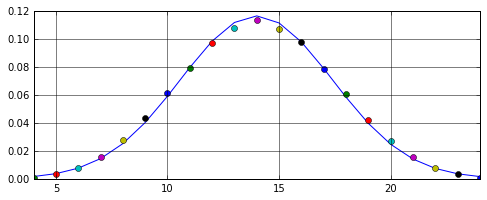

In [1]:
%matplotlib inline
%config inlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

def normal_distribution(mu, sig2, x):
    return np.exp(-(x-mu)**2 / (2*sig2)) / np.sqrt(2*np.math.pi*sig2)

M = 4
N = 100000
data = np.zeros(M*6+1, dtype=int)
d = []
for i in range(N):
    a = 0;
    for j in range(M):
        a = a + np.random.randint(1, 7)
    d.append(a)
    data[a] = data[a] + 1

mu = 0.0
for i in range(data.size):
    if data[i] != 0:
        mu = mu + i * data[i]
mu = mu / N
sig2 = 0.0
for i in range(data.size):
    if data[i] != 0:
        sig2 = sig2 + (i - mu)**2 * data[i]
sig2 = sig2 / (N - 1)
print('mu=', mu, ' sig2=', sig2, ' sig=', np.sqrt(sig2))    

x = np.arange(M, M*6+1, 1)
y = normal_distribution(mu, sig2, x)

plt.rcParams["figure.figsize"] = (8,3)
plt.grid(which='major',color='black',linestyle='-')    
plt.xlim(M, M*6)
plt.plot(x, y)
for i in range(data.size):
    if data[i] != 0:
        plt.plot(i, data[i] / N, 'o')
plt.show()


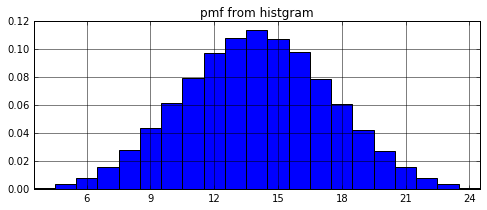

In [2]:
# probability mass function
#from scipy.stats import histogram
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def generate_pmf(d):
    hist = np.histogram(d, max(d) - min(d) + 1)
    return (lambda x: (hist[0] / len(d))[x - min(d)])

pmf = generate_pmf(d)
x = np.arange(min(d), max(d) + 1)
plt.rcParams["figure.figsize"] = (8,3)
plt.title('pmf from histgram')
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.grid(which='major',color='black',linestyle='-')
plt.xlim(x[0] - 0.5, x[-1] + 0.5)
plt.bar(x - 0.5, pmf(x), width=1.0)
plt.show()

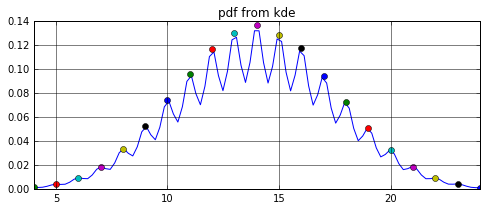

In [3]:
# probability density function
# use Kernel Density Estimation
from scipy.stats import gaussian_kde
kde = gaussian_kde(d)
x = np.linspace(min(d), max(d), 100)

plt.rcParams["figure.figsize"] = (8,3)
plt.title('pdf from kde')
plt.grid(which='major',color='black',linestyle='-')
plt.xlim(min(d), max(d))
plt.plot(x, kde(x))
for i in np.arange(min(d), max(d) + 1, 1):
    plt.plot(i, kde(i), 'o')
plt.show()

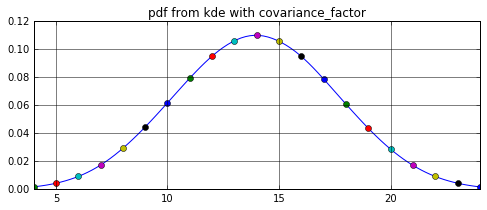

In [10]:
from scipy.stats import gaussian_kde
kde = gaussian_kde(d)
kde.covariance_factor = lambda : 0.25
kde._compute_covariance()

x = np.linspace(min(d), max(d), 100)

plt.rcParams["figure.figsize"] = (8,3)
plt.title('pdf from kde with covariance_factor')
plt.grid(which='major',color='black',linestyle='-')
plt.xlim(min(d), max(d))
plt.plot(x, kde(x))
for i in np.arange(min(d), max(d) + 1, 1):
    plt.plot(i, kde(i), 'o')
plt.show()
